# Support Vector Machine

Support Vector Machines (SVM) are a type of supervised machine learning algorithm used primarily for classification tasks, but they can also be used for regression and outlier detection. Here's a simple explanation:

### What are Support Vector Machines?

- **Purpose**: SVMs are designed to find the optimal boundary (or hyperplane) that best separates different classes in a dataset.
- **Optimal Boundary**: The hyperplane is chosen to maximize the margin between the classes. The margin is the distance between the hyperplane and the nearest data points from each class, which are called support vectors.
- **Nonlinear Classification**: SVMs can handle nonlinear boundaries by transforming the original feature space into a higher-dimensional space using a kernel function. This allows them to find a linear separating hyperplane in this transformed space, which corresponds to a nonlinear boundary in the original space.

### Use Cases for Support Vector Machines

1. **Image Classification**:
   - SVMs are used to classify images, such as distinguishing between cats and dogs, or detecting objects within an image.
   
2. **Text Classification**:
   - SVMs are effective in text classification tasks like spam detection in emails, sentiment analysis, and categorizing news articles.
   
3. **Bioinformatics**:
   - SVMs are applied in genomics and proteomics to classify proteins, genes, and other biological data.
   
4. **Handwriting Recognition**:
   - SVMs help in recognizing handwritten characters, making them useful in OCR (Optical Character Recognition) systems.
   
5. **Financial Applications**:
   - SVMs are used for stock market prediction, credit risk analysis, and detecting fraudulent transactions.
   
6. **Face Detection**:
   - In computer vision, SVMs are used for detecting faces in images and videos.
   
7. **Medical Diagnosis**:
   - SVMs assist in diagnosing diseases by classifying medical images and patient data into different categories (e.g., healthy vs. diseased).
   
8. **Speech Recognition**:
   - SVMs contribute to recognizing spoken words and phrases, improving the accuracy of voice-controlled applications.

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. This is called large margin classification.

![Large Margin Classification](</Users/sakshambedi/Documents/project/ML/hands on machine learning/img/chapter%205/Screenshot%202024-06-04%20at%201.09.52 PM.jpg>)

## Soft Margin Classification

Hard margin classification strictly requires that all instances be perfectly separated by the decision boundary, with no instances falling within the margin. However, this approach has two major drawbacks: it only works if the data is linearly separable, and it is highly sensitive to outliers. For instance, Figure 5-3 shows that adding just one outlier to the iris dataset can make it impossible to find a hard margin, or it can drastically alter the decision boundary, potentially reducing its ability to generalize. To address these issues, a more flexible approach called soft margin classification is preferred. Soft margin classification aims to balance maximizing the margin width and allowing some margin violations, improving the model's robustness and generalization capability.

![Hard Margin sensitivity to outliers](<./img/chapter 5/Screenshot 2024-06-04 at 1.15.38 PM.jpg>)

In the context of Support Vector Machines (SVM) and other machine learning models, overfitting refers to a model that learns the training data too well, capturing noise and details that do not generalize to new, unseen data. This results in high accuracy on the training set but poor performance on the test set or new data.

### Overfitting in SVM

For SVMs, overfitting can occur in the following scenarios:

1. **Hard Margin Classification**: If the model uses a hard margin (i.e., strictly no instances within the margin), it might create a decision boundary that perfectly separates the training data but is too complex, capturing noise and outliers. This strict separation may not generalize well to new data.

2. **High Regularization Parameter (C)**: When the regularization parameter \( C \) is set very high, the SVM model tries to minimize the classification error as much as possible, resulting in a complex decision boundary that may fit the training data perfectly. This reduces the model's ability to generalize to new data, leading to overfitting.

### Signs of Overfitting

1. **High Training Accuracy, Low Test Accuracy**: The model performs exceptionally well on training data but poorly on test data.
2. **Complex Decision Boundary**: The decision boundary is overly complex, capturing noise and specific details of the training data.
3. **Sensitivity to Noise and Outliers**: The model's performance is significantly affected by small changes or noise in the training data.

### Avoiding Overfitting in SVM

1. **Soft Margin Classification**: By allowing some instances to fall within the margin (soft margin), the SVM can create a more generalized decision boundary that is less sensitive to noise and outliers. This helps in improving the model's performance on new data.
2. **Tuning the Regularization Parameter (C)**: Adjusting the parameter \( C \) helps to find the right balance between margin maximization and classification error minimization. A lower \( C \) allows for a wider margin with some misclassifications, which can lead to better generalization.
3. **Cross-Validation**: Using techniques like cross-validation helps in assessing the model's performance on different subsets of the data, ensuring that it generalizes well.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [13]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # Get the petal length and the petal width 
y = (iris["target"] == 2).astype(np.float64) # from all the target value make a array where value is 2 to True and convert the array to a float point

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [12]:
X.shape

(100, 2)

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**NOTE :** 
1. Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it is much slower, especially with large training sets, so it is not recommended. 
2. Another option is to use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core train‐ ing), or to handle online classification tasks.

## Non Linear SVM Classifier

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset. Consider the left plot in Figure 5-5: it represents a simple dataset with just one feature $x_1$. This dataset is not linearly separable, as you can see. But if you add a second feature $x^2 = (x_1)^2$, the resulting 2D dataset is perfectly linearly separable.

![Adding Features to make a dataset linearly separable](</Users/sakshambedi/Documents/project/ML/hands on machine learning/img/chapter 5/Screenshot 2024-06-04 at 2.35.53 PM.jpg>)




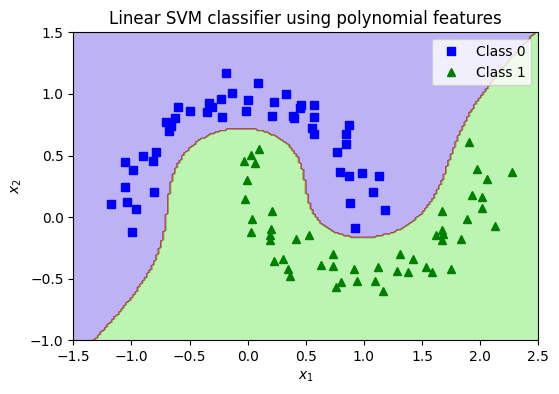

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

# Generate the make_moons dataset
X, y = make_moons(noise=0.1, random_state=42)
# X, y = make_moons()

# Create a pipeline with Polynomial Features, Standard Scaler, and Linear SVM
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=20000))
])

# Fit the model
polynomial_svm_clf.fit(X, y)

# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend(loc="best")
    plt.axis(axes)

# Plot the decision boundary
plt.figure(figsize=(6, 4))
plot_decision_boundary(polynomial_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Linear SVM classifier using polynomial features")
plt.show()

In [24]:
from sklearn.svm import SVC
# This code trains an SVM classifier using a 3rd-degree polynomial kernel.
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3,coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

It is represented on the left of _Figure 5-7_. On the right is another SVM classifier using a 10th degree polynomial kernel. Obviously, if your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing it. The hyperparameter coef0 controls how much the model is influenced by high-degree polynomials versus low-degree polynomials

![SVM classifier with a polynomial kernel](<./img/chapter 5/Screenshot 2024-06-04 at 3.43.58 PM.jpg>)

### Adding Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark. For example, let’s take the one-dimensional dataset discussed earlier and add two landmarks to it at $x_1 = –2$ and $x_1 = 1$.

Next, let’s define the similarity function to be the Gaussian Radial Basis Function (RBF) with $\gamma$ = 0.3 

$
\begin{equation}
\phi_{\gamma}(\mathbf{x}, \ell) = \exp \left( -\gamma \| \mathbf{x} - \ell \|^2 \right)
\end{equation}
$

It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark). Now we are ready to compute the new features. For example, let’s look at the instance $x_1 = –1$: it is located at a distance of 1 from the first landmark, and 2 from the second landmark. Therefore its new features are $x_2 = \text{exp} (–0.3 × 1^2) \approx 0.74$ and $x_3 = \text{exp} (–0.3 × 2^2) \approx 0.30$. The plot on the right of Figure 5-8 shows the transformed dataset (dropping the original features). 

![Similarity Features Using the Gaussian RBF](</Users/sakshambedi/Documents/project/ML/hands on machine learning/img/chapter 5/Screenshot 2024-06-05 at 1.38.46 PM.jpg>)



Simple approach to creating a landmarks is to create landmark at each location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. 

**Downside** : A training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $$ features (assuming you drop the original features). If your training set is very large, you end up with an equally large number of features.



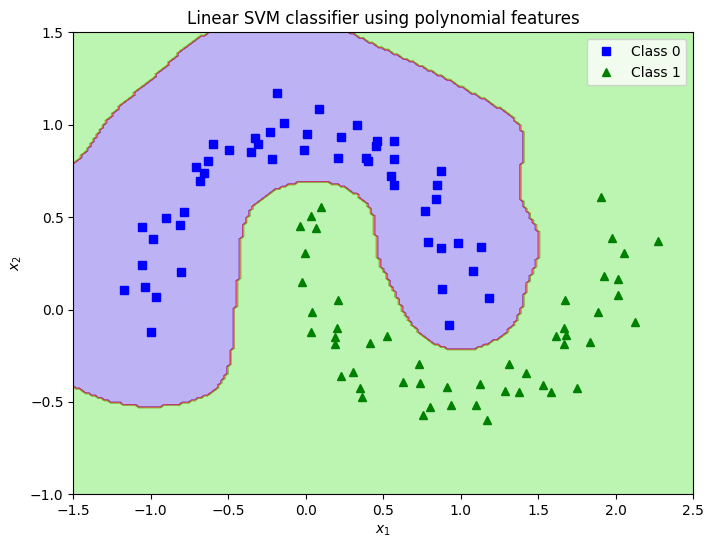

In [26]:
# Implementing Guassing RBF Kernel
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5,C=1000))
])

rbf_kernel_svm_clf.fit(X=X, y=y)

# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 200)
    x1s = np.linspace(axes[2], axes[3], 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.brg)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Class 1")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend(loc="best")
    plt.axis(axes)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(rbf_kernel_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Linear SVM classifier using polynomial features")
plt.show()


![SVM classifier using RBF kernel](<./img/chapter 5/Screenshot 2024-06-05 at 2.53.42 PM.jpg>)


**Analysis Based on this information**

| Position     | $\gamma$ | C    | Gamma $(\gamma)$ Description                                           | C Description                                                | Decision Boundary Description                                                                                                                                   |
|--------------|------------|------|-------------------------------------------------------------------------|--------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Top Left     | 0.1        | 0.001| Low value (0.1), meaning the influence of a single training example is far-reaching. | Very low value (0.001), indicating high regularization.      | The classifier is underfitting. The decision boundary is almost linear, failing to capture the complexity of the data.                                           |
| Top Right    | 0.1        | 1000 | Low value (0.1), still far-reaching influence.                          | Very high value (1000), indicating low regularization.        | The classifier fits the data better compared to the top left plot, capturing more of the data’s complexity. However, it might still be underfitting due to the low gamma value. |
| Bottom Left  | 5          | 0.001| High value (5), meaning the influence of a single training example is more localized. | Very low value (0.001), indicating high regularization.      | The classifier is underfitting. Despite the high gamma value, the high regularization prevents the model from capturing the data’s complexity.                    |
| Bottom Right | 5          | 1000 | High value (5), localized influence.                                    | Very high value (1000), indicating low regularization.        | The classifier is fitting the data well, capturing the complex structure and providing a more accurate separation between classes.                                |


**_NOTE_** : As a rule of thumb, you should always try the linear kernel first (remember that LinearSVC is much faster than SVC(ker nel="linear")), especially if the training set is very large or if it has plenty of features.

## Computational Complexity

LinearSVC algorithm takes longer if you require a very high precision. This is controlled by the tolerance hyperparameter $\epsilon$ (called tol in Scikit). In most classification tasks, the default tolerance is fine.

The SVC algorithm is perfect for complex but small or medium training sets. However, it scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). In this case, the algorithm scales roughly with the average number of nonzero features per instance. 


| Class        | Time complexity           | Out-of-core support | Scaling required | Kernel trick |
|--------------|---------------------------|---------------------|------------------|--------------|
| LinearSVC    | $O(m \times n)$         | No                  | Yes              | No           |
| SGDClassifier| $O(m \times n)$         | Yes                 | Yes              | No           |
| SVC          | $O(m^2 \times n)$ to $O(m^3 \times n)$ | No                  | Yes              | Yes           |

## SVM Regression

The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations. 

The width of the street is controlled by a hyperparameter $\epsilon$

![Example of SVM Regression](<./img/chapter 5/Screenshot 2024-06-05 at 9.50.12 PM.jpg>)

Adding more training instances within the margin does not affect the model’s predic‐ tions; thus, the model is said to be $\epsilon-\text{insensitive}$.

In [19]:
# Scikit-Learn’s LinearSVR class to perform linear SVM Regression

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)


LinearSVR(epsilon=1.5)

In [28]:
# To tackle non-linear regression task
# User a kernelized SVM Model

from sklearn.svm import SVR

svm_poly_reg  = SVR(kernel="poly", degree=2,C = 100, epsilon= 0.1)
svm_poly_reg.fit(X,y)


SVR(C=100, degree=2, kernel='poly')

The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. The LinearSVR class scales linearly with the size of the train‐ ing set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class).


![SVM Regression using 2nd-degree polynominal kernel](<./img/chapter 5/Screenshot 2024-06-05 at 10.26.44 PM.jpg>)



## Decision Functions and Predictions 

The linear SVm classifier model predicts the class of a new instance x by simply computing the decision fuction $ w^{T} x + b = w_{1} x_{1} + .... + w_{n} x_{n} + b$ of the result is positive. The predicted class $\hat{y}$ is the positive class or else it is the negative class. As shown in equation below. 

$\hat{y} = \begin{cases} 
0 & \text{if } \mathbf{w}^\top \mathbf{x} + b < 0, \\
1 & \text{if } \mathbf{w}^\top \mathbf{x} + b \geq 0
\end{cases}$

Figure 5-12 shows the decision function that corresponds to the model on the left of Figure 5-4: it is a two-dimensional plane since this dataset has two features (petal width and petal length). The decision boundary is the set of points where the decision function is equal to 0: it is the intersection of two planes, which is a straight line (represented by the thick solid line).

![Decision Function for the iris dataset](<./img/chapter 5/Screenshot 2024-06-06 at 12.21.32 PM.jpg>)


Training a linear SVM classifier means finding the value of w and b that make this margin as wide as possible while avoiding margin violations (hard margin) or limiting them (soft margin).


### Training Objective

Consider the slope of the decision function: it is equal to the norm of the weight vector, $| w |$. If we divide this slope by 2, the points where the decision function is equal to $\pm 1$ are going to be twice as far away from the decision boundary. In other words, dividing the slope by 2 will multiply the margin by 2. 

![Smaller Weight vector results in a larger margin](<./img/chapter 5/Screenshot 2024-06-06 at 1.16.59 PM.jpg>)



#### Objective: Maximize the Margin
- **Margin**: The margin is the distance between the decision boundary (where the decision function $ h(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b $ equals 0) and the closest data points (support vectors).
- **Maximizing Margin**: To maximize the margin, we want to minimize the norm of the weight vector $ \mathbf{w} $, denoted as $ \| \mathbf{w} \| $. A smaller $ \| \mathbf{w} \| $] corresponds to a larger margin.

#### Hard Margin Constraint
- **Avoiding Margin Violations**: In a hard margin SVM, we want all training instances to be correctly classified without any violations of the margin.

- **Constraint for Positive Instances**: For positive instances (where the true label $ y^{(i)} = 1 $), we want the decision function to be greater than or equal to 1:
  $$
  h(\mathbf{x}^{(i)}) = \mathbf{w}^T \mathbf{x}^{(i)} + b \geq 1
  $$
- **Constraint for Negative Instances**: For negative instances (where the true label $ y^{(i)} = 0 $), we want the decision function to be less than or equal to -1:
  $$ h(\mathbf{x}^{(i)}) = \mathbf{w}^T \mathbf{x}^{(i)} + b \leq -1 $$

#### Combining the Constraints
- **Defining $ t^{(i)} $**: To unify these constraints, we define a variable $ t^{(i)} $:
  - $ t^{(i)} = 1 $ if $ y^{(i)} = 1 $ (positive instances)
  - $ t^{(i)} = -1 $ if $ y^{(i)} = 0 $ (negative instances)

- **Unified Constraint**: Using $ t^{(i)} $, we can express the constraints for both positive and negative instances in a single equation:
  $$
  t^{(i)} (\mathbf{w}^T \mathbf{x}^{(i)} + b) \geq 1 \quad \text{for all instances}
  $$
  - For positive instances ($ t^{(i)} = 1 $), this becomes $ \mathbf{w}^T \mathbf{x}^{(i)} + b \geq 1 $.
  - For negative instances ($ t^{(i)} = -1 $), this becomes $ \mathbf{w}^T \mathbf{x}^{(i)} + b \leq -1 $, which is equivalent to $ -(\mathbf{w}^T \mathbf{x}^{(i)} + b) \geq 1 $.

Summarizing it all, to achieve a large margin in a hard margin SVM:
1. **Objective**: Minimize $ \| \mathbf{w} \| $ to maximize the margin.
2. **Constraints**: Ensure that for each training instance $ i $:
   - $ t^{(i)} (\mathbf{w}^T \mathbf{x}^{(i)} + b) \geq 1 $.
   - This means that positive instances should have a decision function value of at least 1, and negative instances should have a decision function value of at most -1.




$$ \begin{align*} \\
 & \text{Equation : Hard Margin Linear SVM classifier objective} \\ \\
 \text{Minimize}_{\text{w,b}} & \;\;\;\;\; \frac{1}{2} \mathbf{w}^T \mathbf{w}   \\
\text{Subject to} & \;\;\;\;\; \mathbf{t^{(i)}}  \mathbf{( w^{T} x^{(i)} + b)} \geq \mathbf{1} \;\;\; \text{ for i = 1,2, ... , m } \end{align*} $$



### Quadratic Programming Problem
The hard margin and soft margin problems are both convex quadratic optimization problems with linear constraints. Such problems are known as Quadratic Programming (QP) problems. Many off-the-shelf solvers are available to solve QP problems using a variety of techniques


$$ \begin{align*} \text{Minimize (p)} & \;\;\;\;\; \frac{1}{2} \mathbf{p}^T \mathbf{H} \mathbf{p} + \mathbf{f}^T \mathbf{p}   \\
\text{Subject to} & \;\;\;\;\; \mathbf{A} \mathbf{p} \leq \mathbf{b} \end{align*} $$

$$
\begin{align*} \text{where}  \begin{cases} 
\mathbf{p} &\text{ is an } n_p\text{-dimensional vector } (n_p = \text{number of parameters}), \\
\mathbf{H} &\text{ is an } n_p \times n_p \text{ matrix}, \\
\mathbf{f} &\text{ is an } n_p\text{-dimensional vector}, \\
\mathbf{A} &\text{ is an } n_c \times n_p \text{ matrix } (n_c = \text{number of constraints}), \\
\mathbf{b} &\text{ is an } n_c\text{-dimensional vector}.
\end{cases} 
\end{align*}
$$

### Online SVMs

For linear SVM classifiers, one method is to use Gradient Descent (e.g., using SGDClassifier) to minimize the cost function. Unfortunately it converges much more slowly than the methods based on QP.

$$
\begin{align*}
\text{ Equation : Linear SVM classifier cost function} \\ \\
J(w,b) = \dfrac{1}{2} w^{T} w + \;\; C \sum^{m}_{i=1} max(0 , 1 - t^{i} (w^{T} x^{(i)} + b))
\end{align*}
$$

The first sum in the cost function will push the model to have a small weight vector w, leading to a larger margin. The second sum computes the total of all margin violations. An instance’s margin violation is equal to 0 if it is located off the street and on the correct side, or else it is proportional to the distance to the correct side of the street. Minimizing this term ensures that the model makes the margin violations as small and as few as possible

**NOTE: Missing notes for The Dual Problem, Kernelized SVM and Mercer's Theorem as it seems complex for now. Saved for later exploration.**